<font size="+3"><strong>BUSINESS ANALYTICS</strong></font>

##  Task 2: Predictive Modeling for Business Forecasting

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# import plotly.graph_objects as go
# from scipy import stats

### Task 2.1. Feature Selection and Engineering

In [2]:
# Read data file into memory
financial_data = pd.read_csv("Financial Distress.csv")

In [3]:
financial_data.head()
# financial_data.info()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,1,1,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,1,2,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,1,3,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,4,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,2,1,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [4]:
financial_data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [5]:
financial_data.shape

(3672, 86)

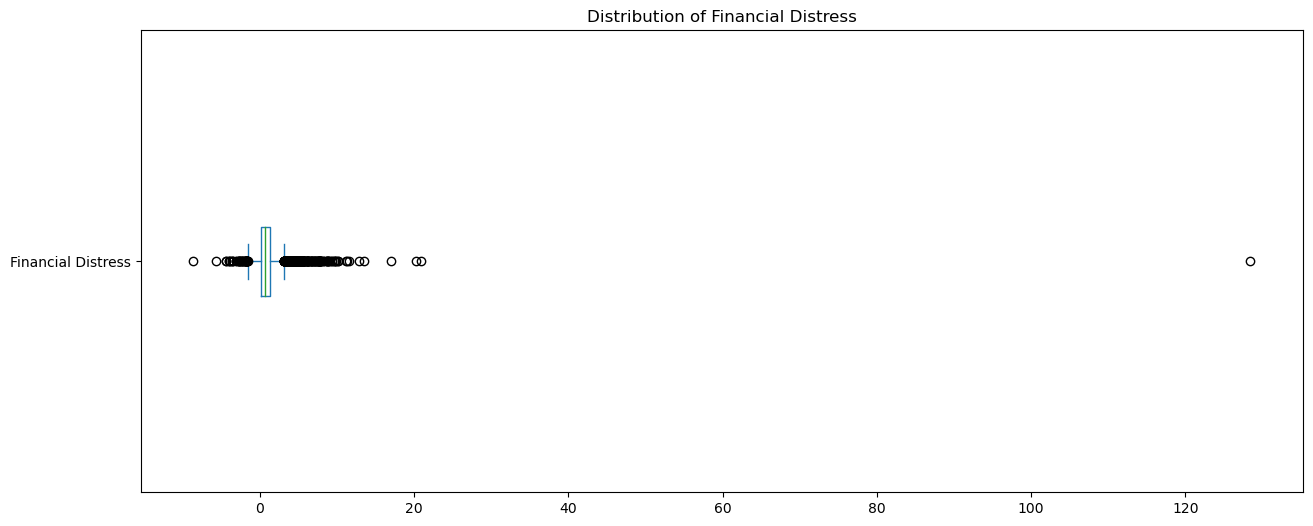

In [6]:
# Check for outliers
fig, ax = plt.subplots(figsize=(15, 6))
financial_data["Financial Distress"].plot(kind="box", vert=False, title="Distribution of Financial Distress", ax=ax);

In [7]:
# Removing outliers from the financial distress column
low, high = financial_data["Financial Distress"].quantile([0.1, 0.9])
mask_fd = financial_data["Financial Distress"].between(low, high)
financial_data = financial_data[mask_fd]


In [8]:
# Summary statistics of data
financial_data.describe()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2.936000e+03,2936.000000,2936.000000,2936.000000,...,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000,2936.000000
mean,182.330381,7.268392,0.769940,1.396602,0.132722,0.605218,8.673154e-01,0.156739,0.108991,0.790248,...,86.772142,88.434419,85.590188,17.685195,15.188424,-2.292151,19.533379,0.899781,12.833106,32.569142
std,115.726617,4.072867,0.662811,1.509296,0.103879,0.173936,5.750628e-01,0.108733,0.208788,1.091830,...,17.258127,64.167820,63.752253,2.013429,2.799784,7.914453,7.590291,2.571932,9.556649,13.689424
min,1.000000,1.000000,-0.078725,0.105410,-0.169500,0.016135,7.510000e-07,-0.157720,-0.627750,0.035160,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.482310,1.000000,2.000000
25%,83.750000,4.000000,0.252078,0.956263,0.059134,0.496885,5.524650e-01,0.080573,-0.024727,0.441720,...,79.951000,38.868000,37.601000,16.000000,13.000000,-6.900000,14.000000,0.236758,6.000000,21.000000
50%,169.000000,7.000000,0.583805,1.187800,0.112275,0.625815,7.807450e-01,0.136895,0.104325,0.650120,...,89.300000,66.120000,59.471000,17.000000,14.500000,0.300000,19.000000,0.576960,11.000000,33.000000
75%,262.000000,11.000000,1.139625,1.509225,0.184473,0.734633,1.032350e+00,0.214372,0.231678,0.895903,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.154925,17.000000,44.000000
max,422.000000,14.000000,2.659800,51.954000,0.682240,0.962620,6.835600e+00,0.638800,0.929550,38.836000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,73.000000


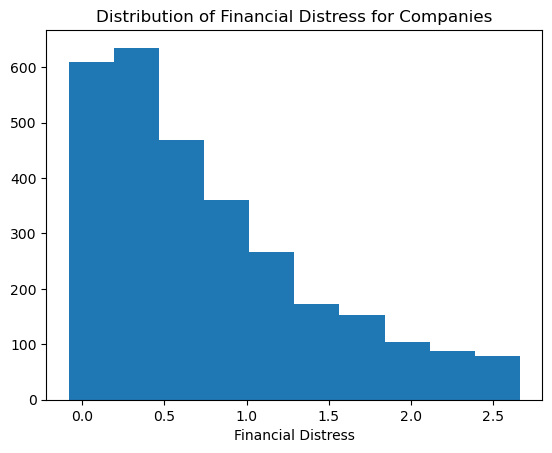

In [9]:
# Explore the Financial Distress columns of the data

# Histogram
plt.hist(financial_data["Financial Distress"])
plt.xlabel("Financial Distress")
plt.title("Distribution of Financial Distress for Companies");

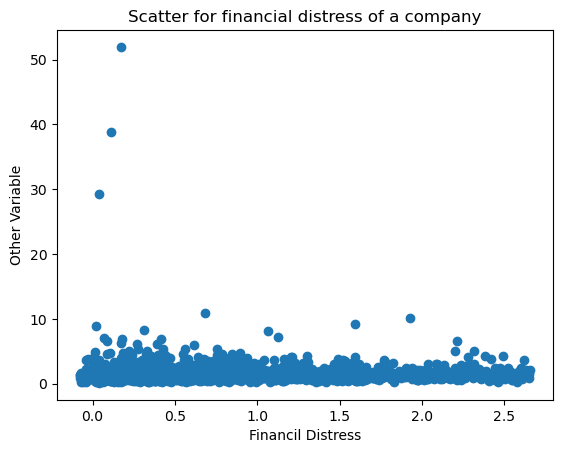

In [10]:
# Scatter plot
plt.scatter(x=financial_data["Financial Distress"], y=financial_data["x1"])
plt.xlabel("Financil Distress")
plt.ylabel("Other Variable")
plt.title("Scatter for financial distress of a company");

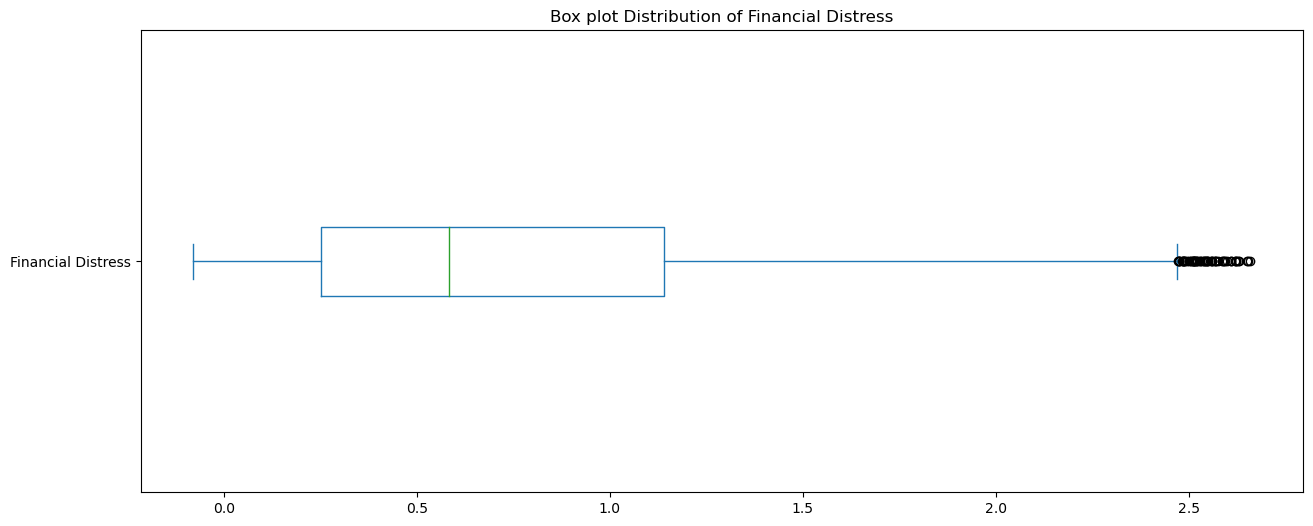

In [11]:
# Box plot
fig, ax = plt.subplots(figsize=(15, 6))
financial_data["Financial Distress"].plot(kind="box", vert=False, title="Box plot Distribution of Financial Distress", ax=ax);

### Task 2.2. Model Selection and Development

In [12]:
# Split data into training and testing

# X_train, y_train = financial_data.loc[:,financial_data.columns!='Financial Distress'], financial_data.loc[:,'Financial Distress']#.values
X, y = financial_data.loc[:,financial_data.columns=='x1'], financial_data.loc[:,'Financial Distress']#.values
y.head()
# y_train.head()

0    0.010636
4    1.357300
5    0.007188
6    1.200200
7    2.234800
Name: Financial Distress, dtype: float64

In [13]:
# # Split data in test and training
# target = "Financial Distress"
# feature = "x1"
# y = financial_data[target]
# X = financial_data[feature]
# # X = financial_data.drop(columns=target)
# X.head()

In [29]:
# Cutoff point to split the data into two
cutoff = int(len(X) * 0.7)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

y_test.shape

(881,)

In [30]:
# Shape of our feature and target vectors
print(f"Shape of Feature matrix {X_train.shape}.")
print(f"Shape of Target vectore {y_train.shape}.")

Shape of Feature matrix (2055, 1).
Shape of Target vectore (2055,).


In [31]:
# Building the baseline model for lenear regression
y_mean = y_train.mean()
y_mean


0.793670280836983

In [32]:
y_pred_baseline = [y_mean] * len(y_train)

In [34]:
# y_pred_baseline

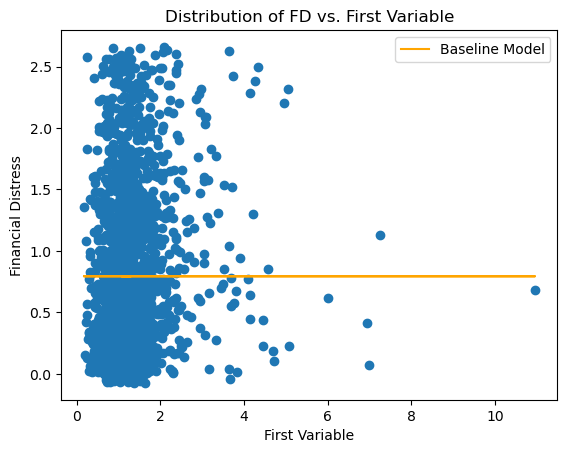

In [35]:
plt.plot(X_train.values, y_pred_baseline, color="orange", label="Baseline Model")
plt.scatter(X_train, y_train)
plt.xlabel("First Variable")
plt.ylabel("Financial Distress")
plt.title("Distribution of FD vs. First Variable")
plt.legend();

In [36]:
# Calculate the baseline for the mean absolute error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt value", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt value 0.79
Baseline MAE: 0.54


In [37]:
# Iterate the model

# Build the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

### Task 2.3. Model Evaluation and Validation

In [38]:
# Evaluate the model's performance
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([0.79313659, 0.76642923, 0.76563546, 0.75522972, 0.76602624])

In [39]:
# Calculate your training MAE and RMSE for your predictions
mae_training = mean_absolute_error(y_train, y_pred_training)
rmse = np.sqrt(mean_squared_error(y_train, y_pred_training))

print(f"Training RMSE: {round(rmse, 4)}")
print("Training MAE:", round(mae_training, 4))

Training RMSE: 0.661
Training MAE: 0.5394


In [40]:
# Evaluate model's performance on test data
# X_test = pd.read_csv("")[features]
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    0.722684
1    0.776663
2    0.888499
3    0.917649
4    0.774037
dtype: float64

In [41]:
# Calculate your test MAE and RMSE for your predictions
test_mae = mean_absolute_error(y_test, y_pred_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Tet RMSE: {round(test_rmse, 4)}")
print("Test MAE:", round(test_mae, 4))

Tet RMSE: 0.745
Test MAE: 0.5659


In [42]:
# Performing Cross-validation with the K-Fold Cross-validation option

# Assuming X is your feature matrix and y is your target variable
kf = KFold(n_splits=5, shuffle=True, random_state=42)


# Perform K-Fold Cross-Validation
cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative mean squared error to RMSE
rmse_cv = np.sqrt(-cv_results)

# Print average RMSE across folds
print(f"Average RMSE across folds: {round(np.mean(rmse_cv), 4)}")

Average RMSE across folds: 0.6627


In [43]:
# Extract the intercept and coefficient from the model
intercept = round(model.intercept_, 2)
coefficient = model.coef_.round(2)[0]

print(f"Financial_Distress = {intercept} + ({coefficient} * Other_variable)")

Financial_Distress = 0.64 + (0.12 * Other_variable)


# Interpretation of the results for the linear regression model:

### 1. **Training Stage:**
   - **RMSE (Root Mean Squared Error):** 0.661
   - **MAE (Mean Absolute Error):** 0.5394

### 2. **Testing Stage:**
   - **RMSE (Root Mean Squared Error):** 0.745
   - **MAE (Mean Absolute Error):** 0.5659

### 3. **Cross-Validation:**
   - **Average RMSE across Folds:** 0.6627

### Interpretation:

1. **Training vs. Testing Performance:**
   - The model performed slightly better on the training set (RMSE = 0.661) than on the testing set (RMSE = 0.745). This is a common observation and suggests that the model might be overfitting to the training data.

2. **Cross-Validation:**
   - The average RMSE across folds from K-Fold cross-validation (0.6627) is consistent with the training and testing RMSE values. This indicates that the model's performance is relatively stable across different subsets of the data.

3. **Mean Absolute Error:**
   - Both the training MAE (0.5394) and testing MAE (0.5659) are relatively close, suggesting a consistent performance in terms of the absolute difference between predicted and actual values.

### Business Implications:

1. **Model Performance:**
   - The model demonstrates reasonable predictive performance, with RMSE values in the range of 0.661 to 0.745. This indicates that, on average, the model's predictions are within this range of the actual values.

2. **Overfitting Consideration:**
   - The slight difference between training and testing performance suggests potential overfitting. It's important to monitor for signs of overfitting and consider adjusting the model complexity or regularization techniques if needed.

3. **Prediction Accuracy:**
   - The MAE values (0.5394 and 0.5659) represent the average absolute difference between predicted and actual values. This level of accuracy might be acceptable depending on the business context and the nature of the problem being solved.

4. **Decision-Making Support:**
   - The model can be used as a tool to support decision-making processes, especially if the business problem involves predicting numerical outcomes. It can provide insights into expected values, allowing for more informed decision-making.

5. **Continuous Monitoring:**
   - Regularly monitor the model's performance over time, especially as new data becomes available. Consider retraining the model periodically to ensure its relevance and accuracy.

6. **Further Analysis:**
   - Investigate feature importance to understand which variables contribute the most to the predictions. This information can provide valuable insights for business stakeholders.

In summary, while the model shows promising performance, it's essential to keep an eye on potential overfitting and continuously assess its accuracy as the business environment evolves. Additionally, involving domain experts for a deeper understanding of the results can enhance the model's interpretability and usefulness in a business context.

---
**@ INTERNCAREERS**